In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
dataframe0 = pd.read_csv('/content/drive/MyDrive/AI Project/Eartquakes-1990-2023.csv')

In [ ]:
dataframe0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [ ]:
dataframe0.shape

(3445751, 12)

In [ ]:
dataframe0.head()

time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  1990-01-01 00:22:33.990000+00:00  
1   6.585  1990-01-01 00:24:51.210000+00:00  
2   3.220  1990-01-01 00:34:43.450000+00:00  
3  -0.584  1990-01-01 00:58:32.130000+00:00  
4  16.122  1990-01-01 01:03:44.490000+00:00

In [ ]:
dataframe0.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [ ]:
dataframe0.describe(include='object')

place    status   data_type        state  \
count                      3445751   3445751     3445751      3445751   
unique                      531130         6          25          858   
top     6 km W of Cobb, California  reviewed  earthquake   California   
freq                         24202   3224825     3361846       866675   

                                    date  
count                            3445751  
unique                           3428775  
top     2022-03-02 23:42:23.449000+00:00  
freq                                   4

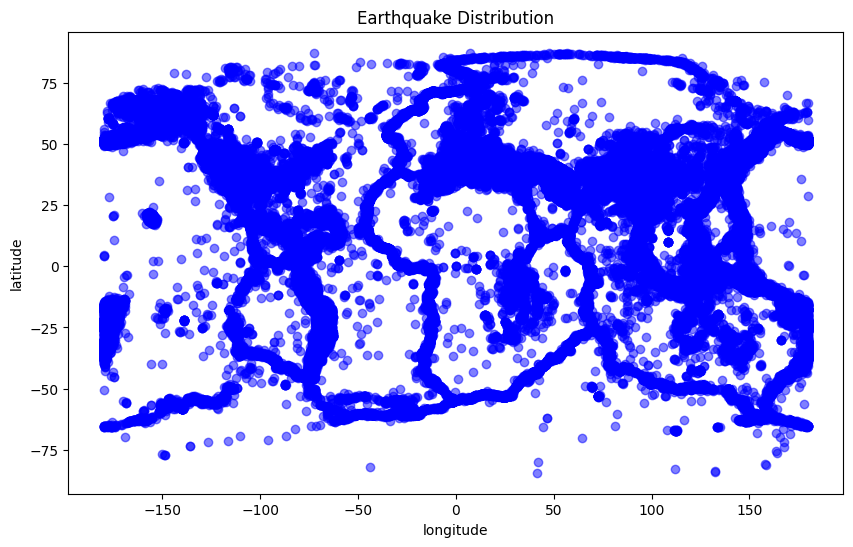

Mean Magnitude: 1.7740761405603154
Median Magnitude: 1.46
Standard Deviation of Magnitude: 1.291055102657228


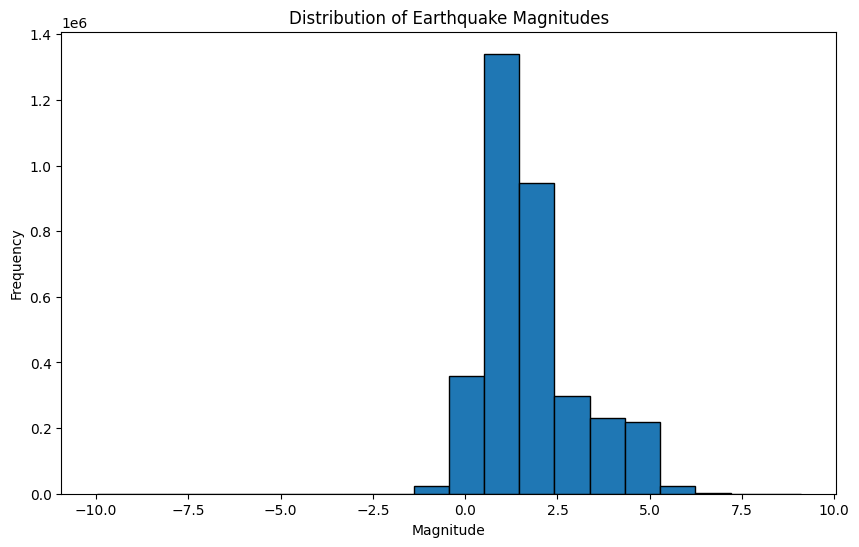

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



#Spatial Analysis
plt.figure(figsize=(10, 6))
plt.scatter(dataframe0['longitude'],dataframe0['latitude'], c='blue', alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Earthquake Distribution')
plt.show()

earthquake_counts_by_region = dataframe0['state'].value_counts()

#Magnitude Analysis
mean_magnitude = dataframe0['magnitudo'].mean()
median_magnitude = dataframe0['magnitudo'].median()
std_deviation_magnitude = dataframe0['magnitudo'].std()

print(f'Mean Magnitude: {mean_magnitude}')
print(f'Median Magnitude: {median_magnitude}')
print(f'Standard Deviation of Magnitude: {std_deviation_magnitude}')

# Create a histogram of earthquake magnitudes
plt.figure(figsize=(10, 6))
plt.hist(dataframe0['magnitudo'], bins=20, edgecolor='k')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

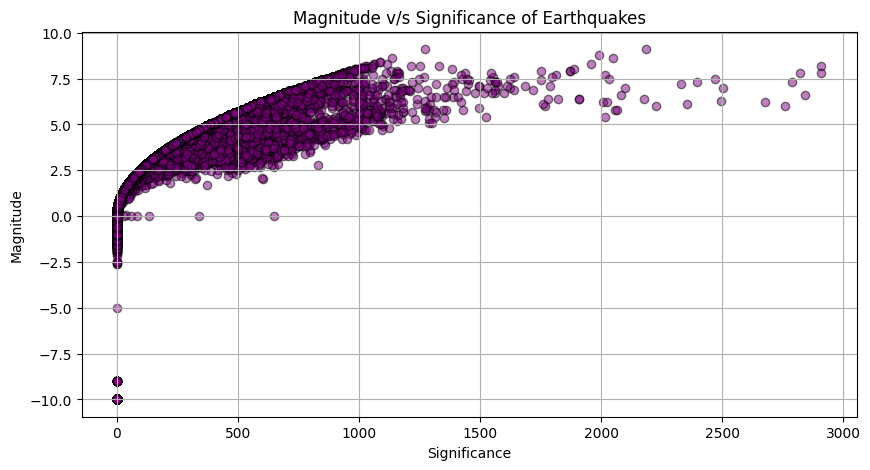

In [ ]:
magnitude = dataframe0['magnitudo']
significance = dataframe0['significance']

plt.figure(figsize=(10, 5))
plt.scatter(significance, magnitude, alpha=0.5, c='purple', edgecolors='k')

plt.xlabel('Significance')
plt.ylabel('Magnitude')
plt.title('Magnitude v/s Significance of Earthquakes')

plt.grid(True)
plt.show()

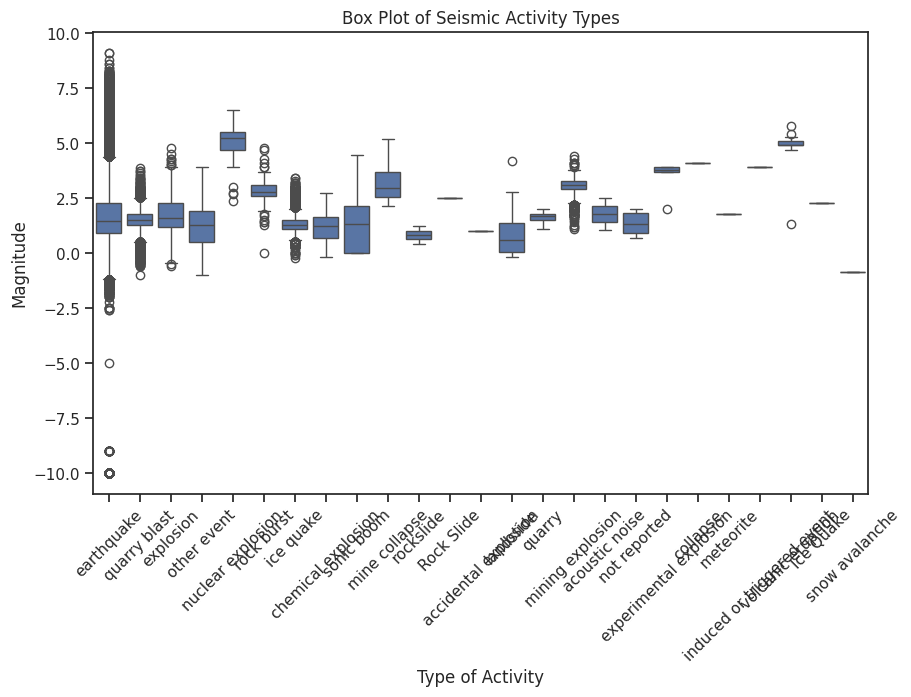

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the seismic activity data
# Replace 'Type of activity' with the actual column name in your dataset
sns.set(style="ticks")
plt.figure(figsize=(10, 6))

# Create a box plot for the 'Type of activity' column
sns.boxplot(x='data_type', y='magnitudo', data=dataframe0)

plt.title('Box Plot of Seismic Activity Types')
plt.xlabel('Type of Activity')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
#Calculate the value counts for each unique value in the 'state' column
import plotly.express as px
dataframe0['state'] = dataframe0['state'].str.strip()
top10_states = dataframe0['state'].value_counts()[:10]


# Create a bar plot using Plotly Express
# y-axis: Count of each state, x-axis: States,
# color-coded by states and using a color palette
fig = px.bar(
    y=top10_states.values,  # y-values: count of each state
    x=top10_states.index,   # x-values: states
    color=top10_states.index,  # Color the bars based on states
    color_discrete_sequence=px.colors.qualitative.Pastel1, # Set color palette
    text=top10_states.values,  # Display the count values on top of the bars
    title='Top 10 States with Highest Occurrences',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Distribution of Earthquake Occurrences by State',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Location",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
dataframe0.date = pd.to_datetime(dataframe0.date, errors='coerce')
def transform_date(df):
    df = df.copy()
    df["hour"] = df.date.dt.hour
    df["day_of_month"] = df.date.dt.day
    df["weekday"] = df.date.dt.day_name()
    df["month"] = df.date.dt.month
    df["month_name"] = df.date.dt.month_name()
    df["year"] =df.date.dt.year
    return df
dataframe0 = transform_date(dataframe0)

In [ ]:

def plot_strongest(df):
    gb_top = dataframe0.groupby(["state"])\
               .agg({"significance":"max", "magnitudo":"max"})\
               .reset_index()

    b = dataframe0[["year", "state","significance","longitude", "latitude","magnitudo"]]
    merge = pd.merge(gb_top, b, how = "left", on =["state","significance", "magnitudo"]).sort_values(by="year")


    fig = px.scatter_geo(merge,
                         lat="latitude", lon="longitude",
                         size="significance",
                         animation_frame="year",
                         projection="natural earth",
                         title = "Strongest eartquake by year")
    fig.show()

plot_strongest(dataframe0)

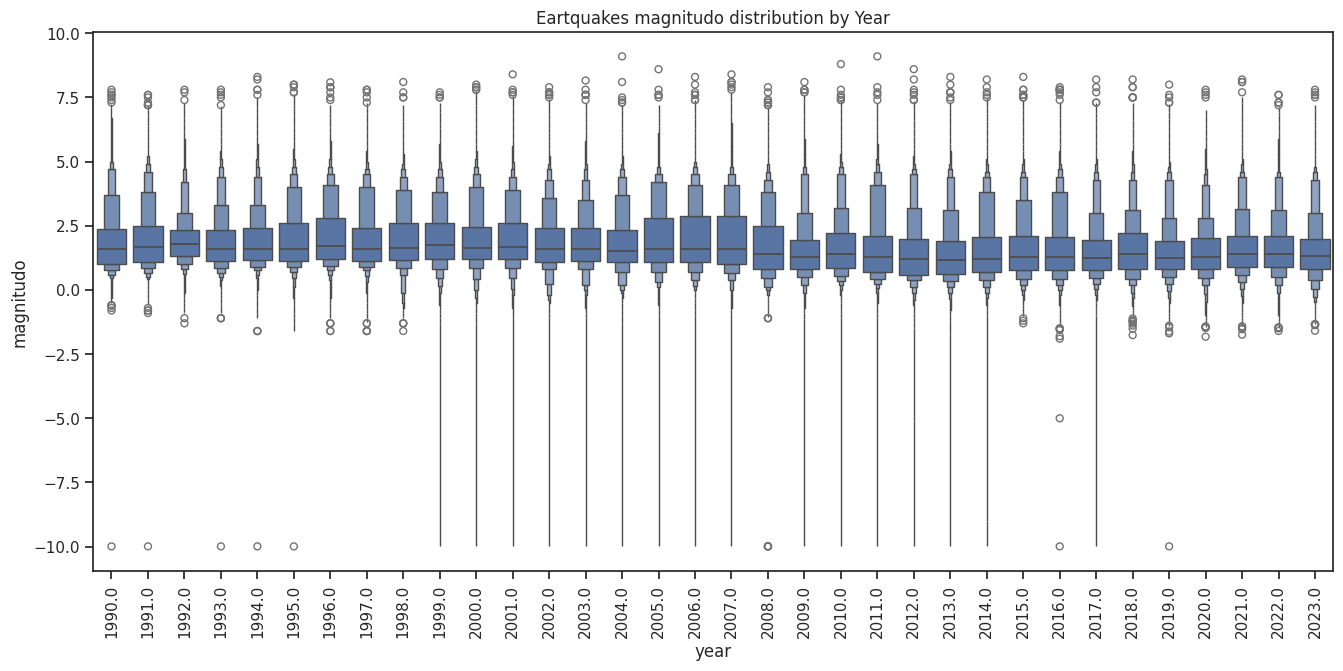

In [ ]:
plt.figure(figsize=(16,7))
sns.boxenplot(dataframe0,x="year", y="magnitudo",linewidth=1 )
plt.xticks(rotation=90)
plt.title("Eartquakes magnitudo distribution by Year")
plt.show()

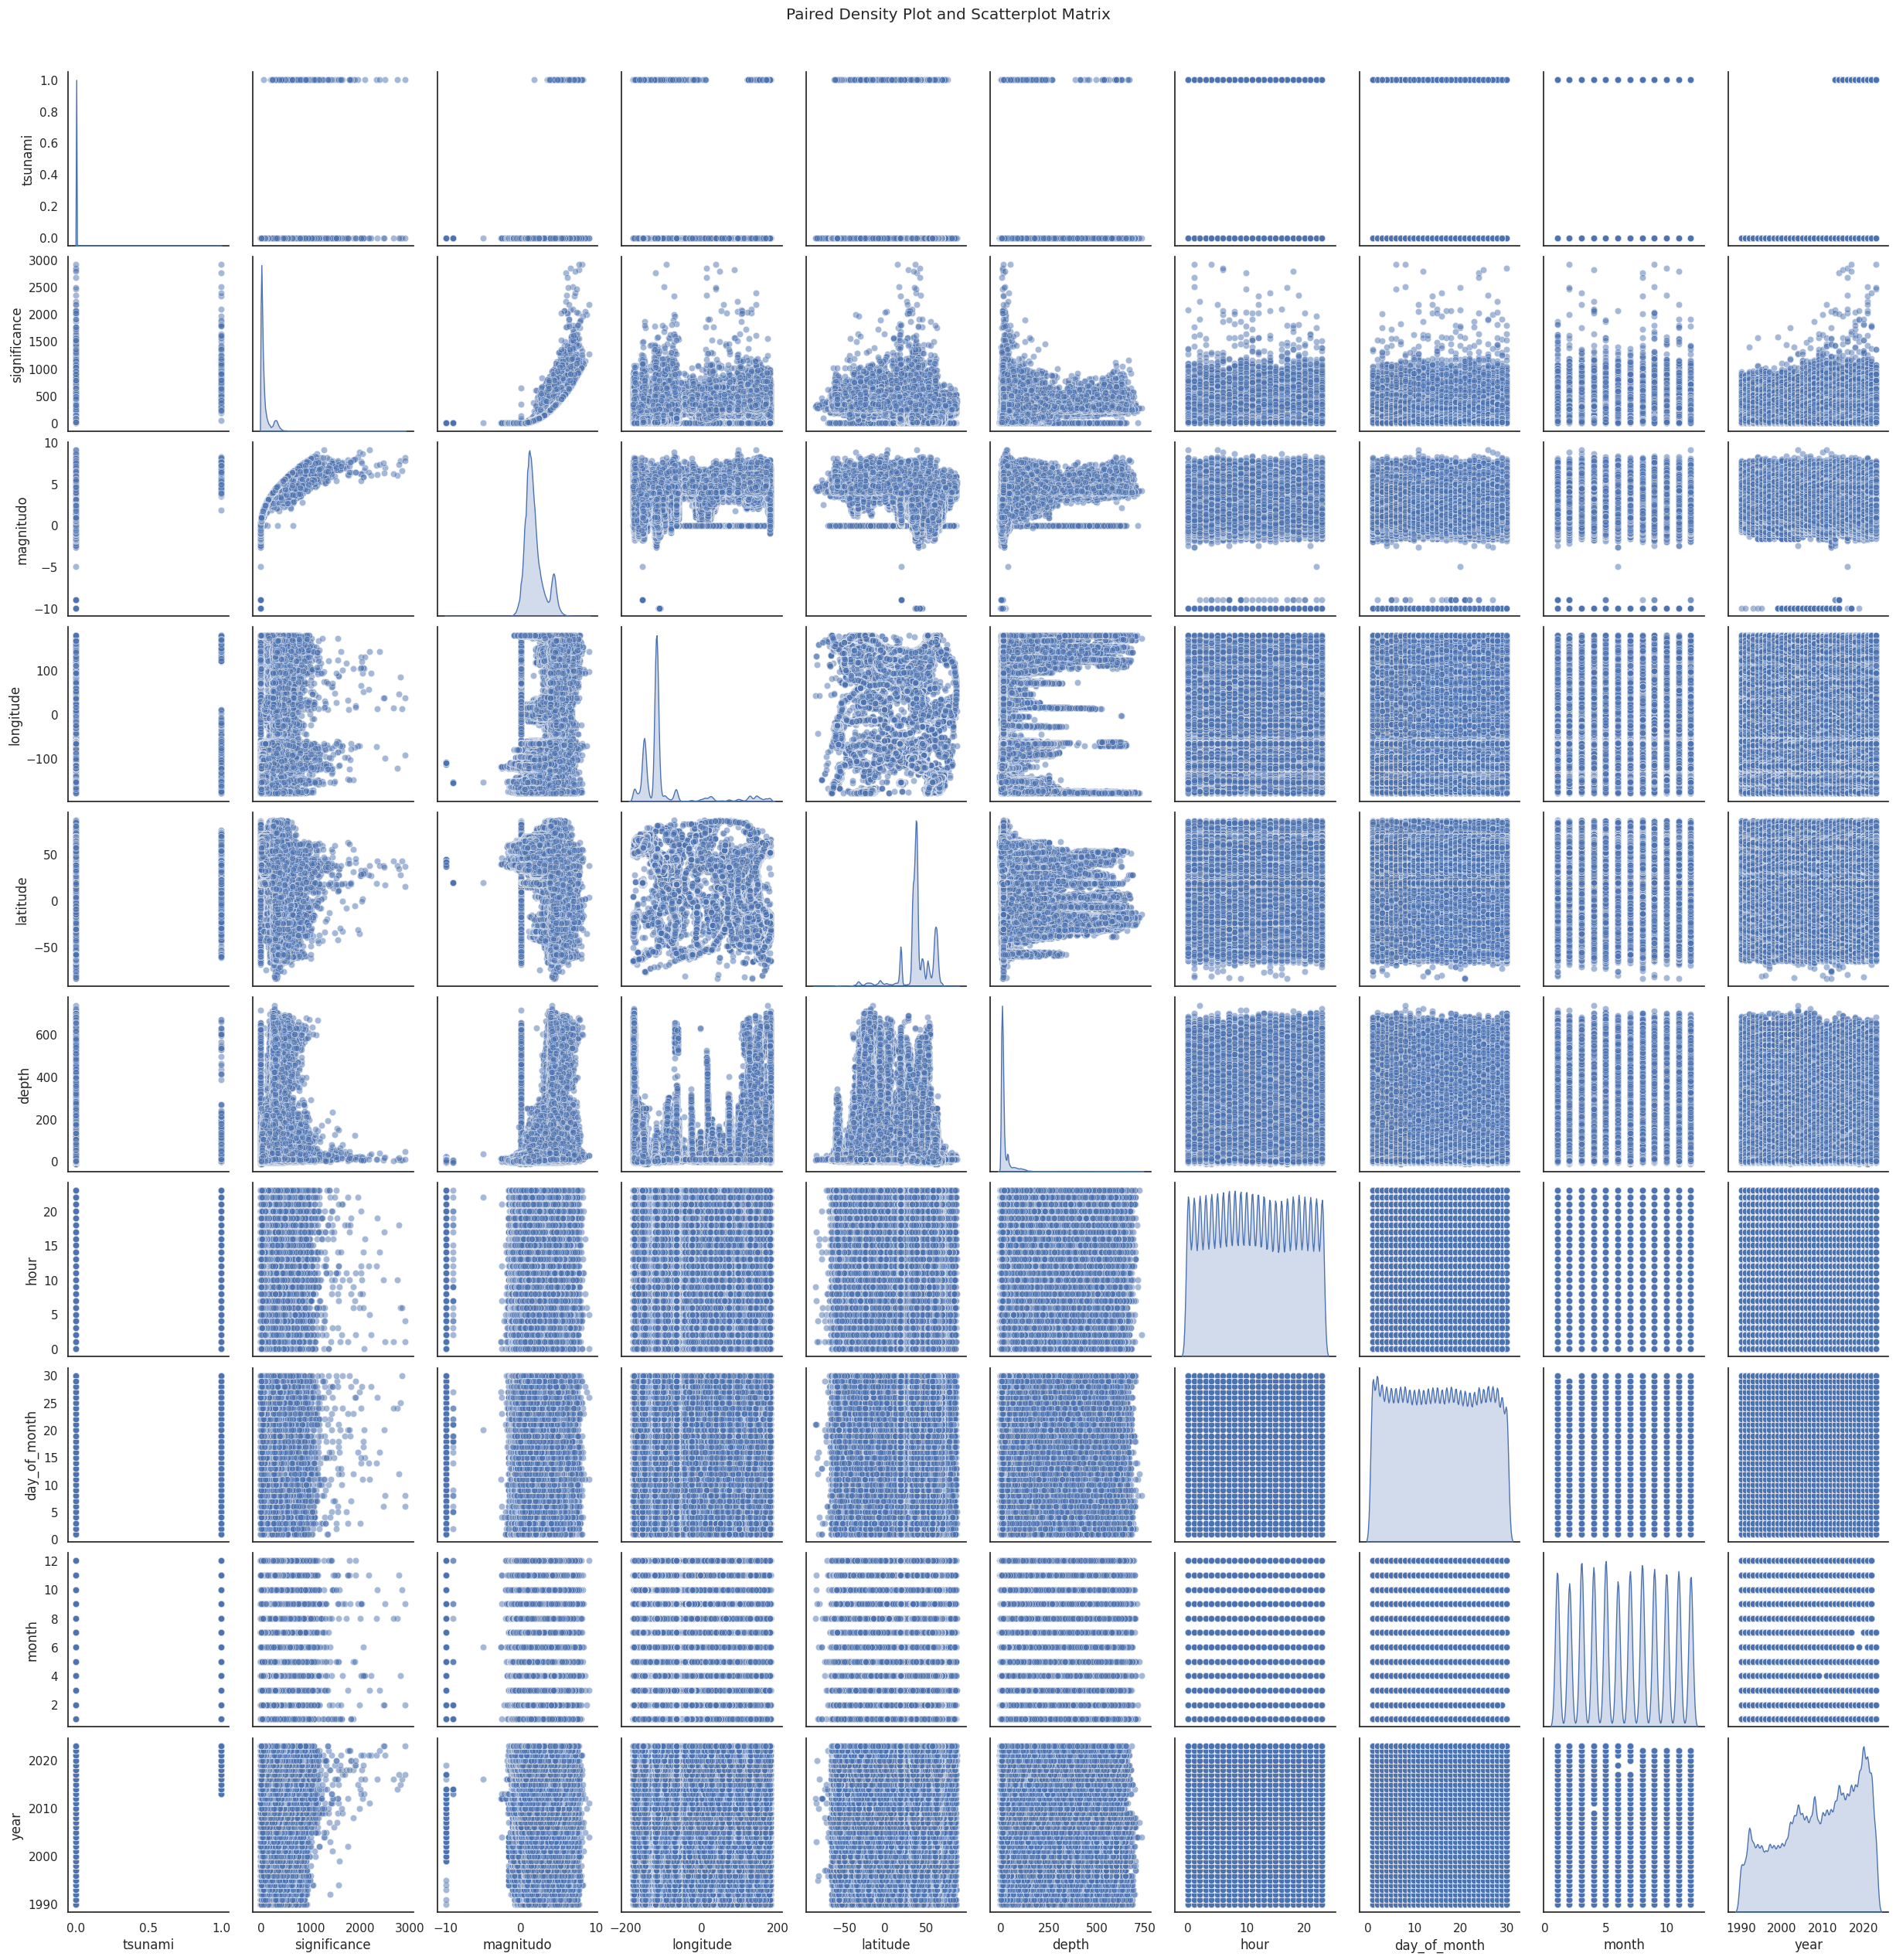

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the dataframe to include only numerical columns
numerical_columns = ['tsunami', 'significance', 'magnitudo', 'longitude', 'latitude', 'depth', 'hour', 'day_of_month', 'month', 'year']
data_subset = dataframe0[numerical_columns]

# Create a paired density plot using Seaborn
sns.set(style="white")
sns.pairplot(data_subset, diag_kind='kde', plot_kws={'alpha': 0.5})

# Add title
plt.suptitle("Paired Density Plot and Scatterplot Matrix", y=1.02)

# Display the plot
plt.show()


In [ ]:
class_counts = dataframe0['status'].value_counts()
print(class_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

imbalance_ratio = class_counts.max() / class_counts.min()
print("Imbalance ratio:", imbalance_ratio)

status
reviewed     3224825
automatic     205714
REVIEWED       14093
AUTOMATIC       1107
manual             8
MANUAL             4
Name: count, dtype: int64


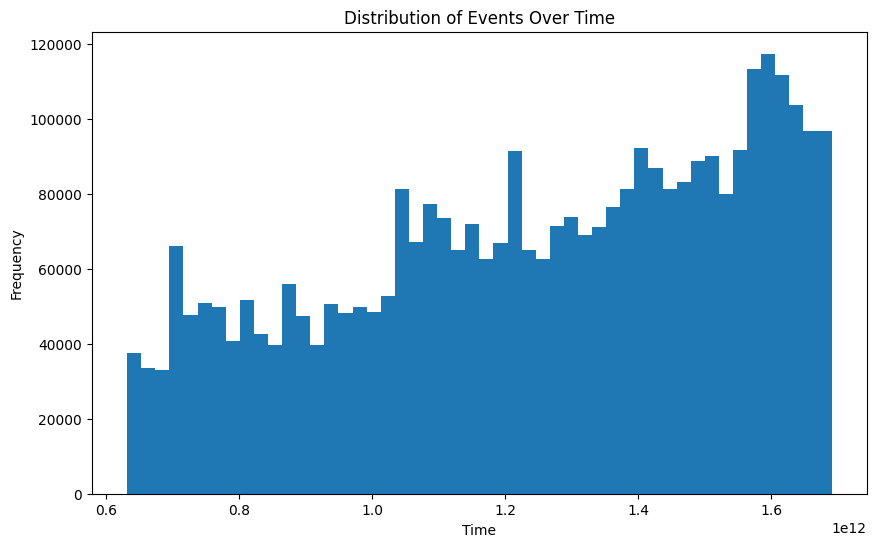

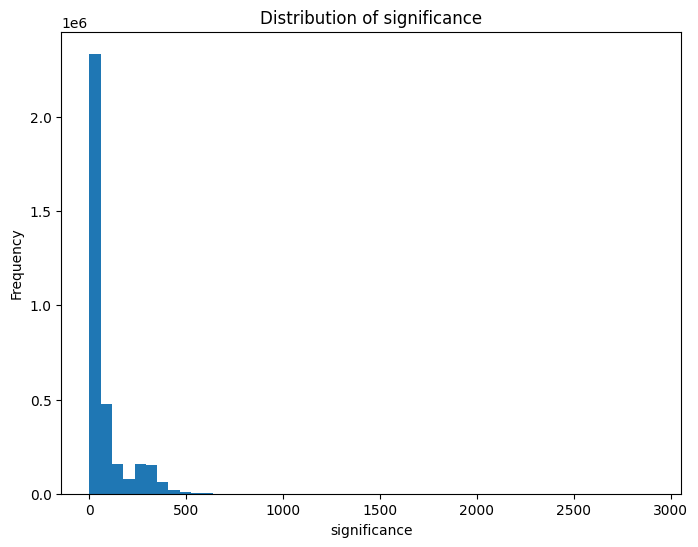

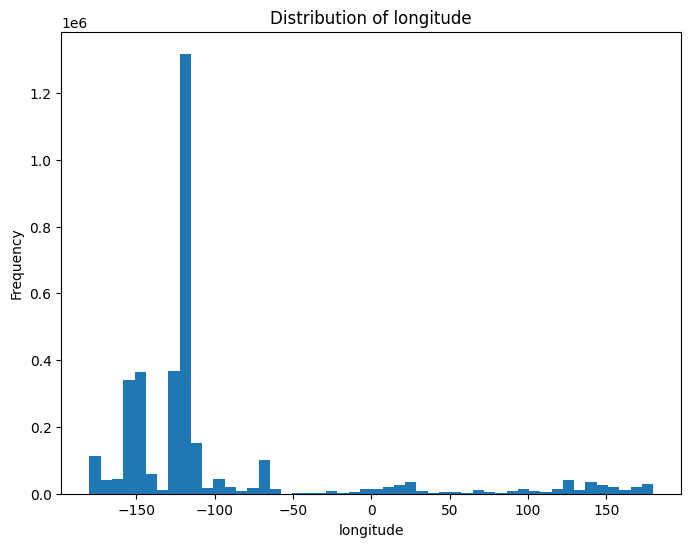

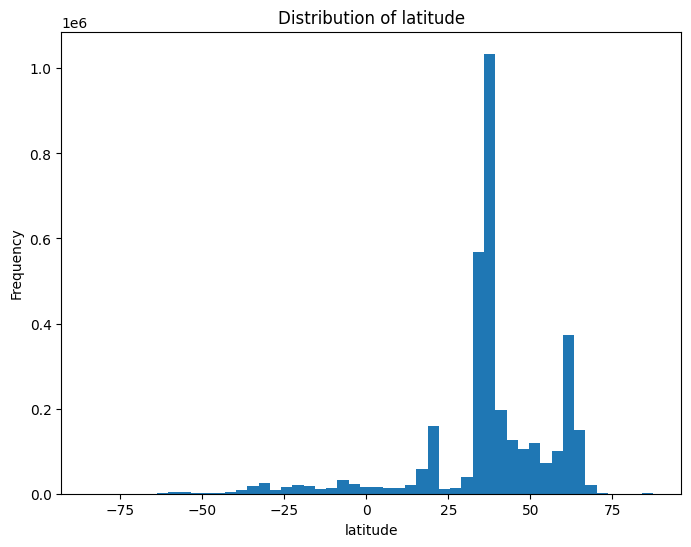

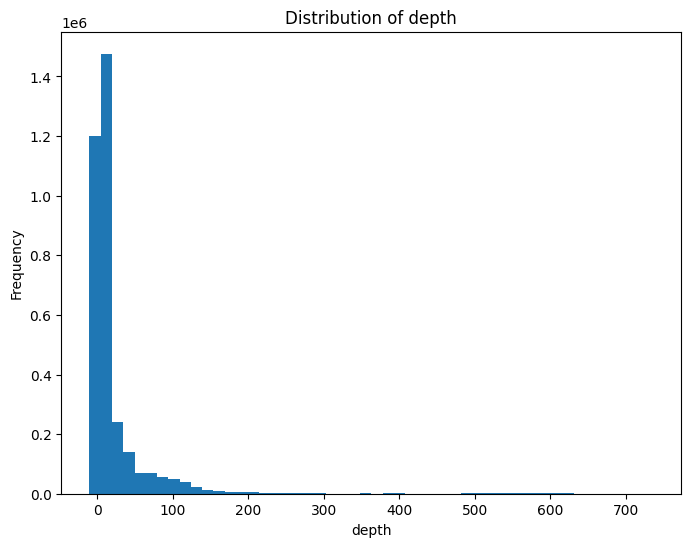

In [ ]:
import matplotlib.pyplot as plt

# Time Series Analysis (for 'time')
plt.figure(figsize=(10, 6))
plt.hist(dataframe0['time'], bins=50)
plt.title('Distribution of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Statistical Summary (for 'significance', 'longitude', 'latitude', 'depth')
columns_of_interest = ['significance', 'longitude', 'latitude', 'depth']
for column in columns_of_interest:
    plt.figure(figsize=(8, 6))
    plt.hist(dataframe0[column], bins=50)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
